In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyerrors as pe

In [2]:
plt.style.use('./base_style.mplstyle')
plt.rc('text', usetex=True)

We can load data from preprocessed pickle files which contain a list of `pyerror` `Obs`:

In [3]:
correlator_data = pe.load_object('./data/correlator_test.p')  

With this list a `Corr` object can be initialised

In [4]:
my_correlator = pe.correlators.Corr(correlator_data)

In [5]:
my_correlator.print([8, 14])

x0/a	Corr(x0/a)
------------------
8	548(13)
9	433(11)
10	343.1(8.6)
11	273.2(6.6)
12	217.5(5.6)
13	172.9(4.9)
14	137.6(4.6)



The `show` method can display the correlator

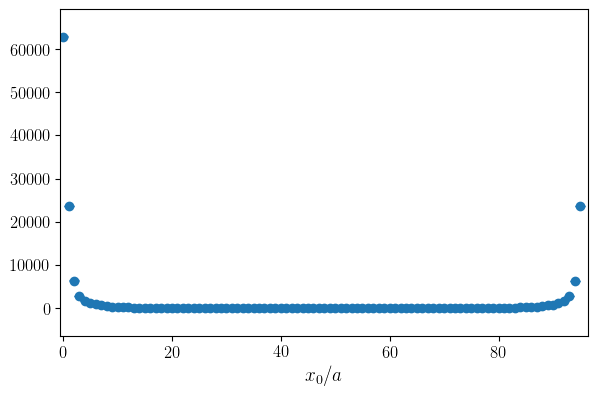

In [6]:
my_correlator.show()

## Manipulating correlators

`Corr` objects can be shifted

In [7]:
shifted_correlator = my_correlator.roll(20)
shifted_correlator.tag = r'Correlator shifted by $x_0/a=20$'

Or symmetrised

In [8]:
symmetrised_correlator = my_correlator.symmetric()
symmetrised_correlator.tag = 'Symmetrised correlator'

And we can compare different `Corr` objects by passing `comp` to the `show` method

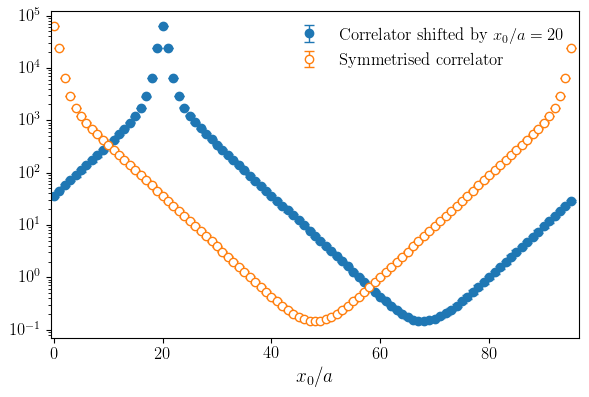

In [9]:
shifted_correlator.show(comp=symmetrised_correlator, logscale=True)

## Effective mass

The effective mass of the correlator can be obtained by calling the `m_eff` method

In [10]:
m_eff = symmetrised_correlator.m_eff()
m_eff.tag = 'Effective mass'

We can also use the priodicity of the lattice in order to obtain the cosh effective mass

In [11]:
periodic_m_eff = symmetrised_correlator.m_eff('periodic')
periodic_m_eff.tag = 'Cosh effective mass'

We can compare the two and see how the standard effective mass deviates form the plateau at the center of the lattice

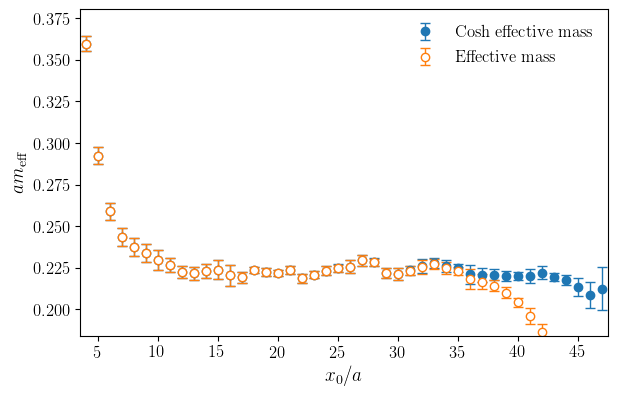

In [12]:
periodic_m_eff.show([4,47], comp=m_eff, ylabel=r'$am_\mathrm{eff}$')

Arithmetic operations and mathematical functions are also overloaded for the `Corr` class. We can compute the difference between the two variants of the effective mass as follows.

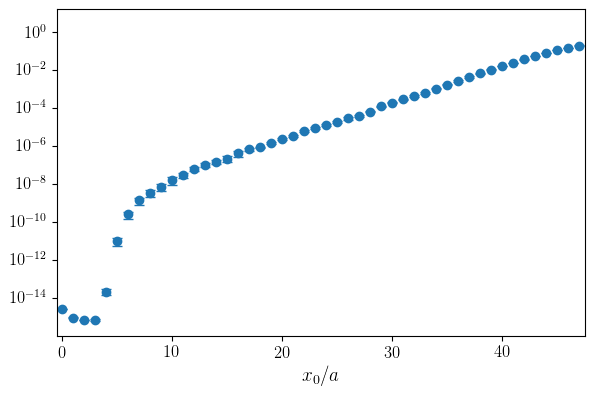

In [13]:
difference_m_eff = np.abs(periodic_m_eff - m_eff)
difference_m_eff.show([0, 47], logscale=True)

## Derivatives

We can obtain derivatives of correlators in the following way

In [14]:
first_derivative = symmetrised_correlator.deriv()
first_derivative.tag = 'First derivative'

In [15]:
second_derivative = symmetrised_correlator.second_deriv()
second_derivative.tag = 'Second derivative'

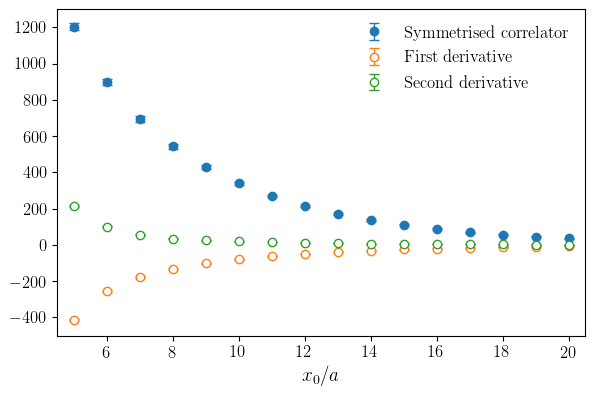

In [16]:
symmetrised_correlator.show([5, 20], comp=[first_derivative, second_derivative], y_range=[-500, 1300])